In [11]:
import data1 as data
import random
from common import *
from rules import *
from realkd.patch import RuleFit
from sklearn.model_selection import cross_validate, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
import numpy as np
import matplotlib.colors as mcolors


In [2]:
import warnings
warnings.filterwarnings("ignore")

## Individual phase prediction


In [3]:
import pickle
cur_save=open('./' + 'interpolation_iid_69' + '.pkl', 'rb')
inter_no_comp69 = pickle.load(cur_save)

In [4]:
import pickle
cur_save=open('./' + 'interpolation_iid_23' + '.pkl', 'rb')
inter_no_comp23 = pickle.load(cur_save)

In [9]:
import pandas as pd

inter_no_comp = {}
for each in ['sphere', 'vesicle', 'worm', 'other']:
    df1 = inter_no_comp23[each].summary()
    df2 = inter_no_comp69[each].summary()
    df1.index = [each +'_sel' for each in df1.index.tolist()]
    df2.index = [each +'_all' for each in df2.index.tolist()]
    df = pd.concat([df1, df2])
    df = df.sort_index()
    inter_no_comp[each] = df

In [13]:
def plot_summary(metric, summ, num_reps=30, baseline=None, names=None, colors = list(mcolors.BASE_COLORS.keys())):
    width = 0.35
    ind = np.arange(len(summ))
    plt.bar(ind-width/2, summ[f'mean_train_{metric}'], width=width, label='train', 
            yerr=summ[f'std_train_{metric}']/num_reps**0.5, capsize=3.0)
    plt.bar(ind+width/2, summ[f'mean_test_{metric}'], width=width, label='test',
            yerr=summ[f'std_test_{metric}']/num_reps**0.5, capsize=3.0)
    if baseline:
        for i in range(len(baseline)):
            plt.axhline(y=baseline[i], color=colors[i], linestyle='-', label=names[i])
    plt.ylabel(metric)
    plt.legend()
    plt.xticks(ind, summ.index)

inter_no_comp_df = {}
for key in inter_no_comp:
    df = inter_no_comp[key]
    df['mean_train_error'] = 1- df['mean_train_accuracy']
    df['std_train_error'] = df['std_train_accuracy']
    df['mean_test_error'] = 1- df['mean_test_accuracy']
    df['std_test_error'] = df['std_test_accuracy']
    inter_no_comp_df[key] = df

In [24]:
# get base line 
# error
informed_error = []
for each in [data.sphere, data.vesicle, data.worm, data.other]:
    uniq, cnt = np.unique(each, return_counts=True)
    prob = cnt/sum(cnt)
    informed_error.append((1-max(prob)))
print('Informed error: ', informed_error)

uniformed_error = [0.5, 0.5, 0.5, 0.5]
print('Uninformed error: ', uniformed_error)

Informed error:  [0.46283783783783783, 0.2922297297297297, 0.33783783783783783, 0.02533783783783783]
Uninformed error:  [0.5, 0.5, 0.5, 0.5]


In [17]:
inter_no_comp_df['sphere']

,mean_train_accuracy,std_train_accuracy,mean_test_accuracy,std_test_accuracy,mean_train_log likelihood,std_train_log likelihood,mean_test_log likelihood,std_test_log likelihood,mean_train_error,std_train_error,mean_test_error,std_test_error
GAM_sel,0.894527,0.062588,0.864649,0.076803,-0.261244,0.014434,-0.564133,0.822524,0.105473,0.062588,0.135351,0.076803
LR_all,0.537162,0.004921,0.537193,0.142011,-0.680825,0.001401,-0.685333,0.041018,0.462838,0.004921,0.462807,0.142011
LR_sel,0.537163,0.004021,0.537982,0.116531,-0.680834,0.001276,-0.684561,0.036543,0.462837,0.004021,0.462018,0.116531
RanF_all,1.000000,0.000000,0.912544,0.073394,-0.056800,0.001796,-0.283283,0.350926,0.000000,0.000000,0.087456,0.073394
RanF_sel,1.000000,0.000000,0.917456,0.062261,-0.059016,0.001503,-0.280355,0.312304,0.000000,0.000000,0.082544,0.062261
RuFit_all,0.983166,0.003390,0.917193,0.060219,-0.076944,0.004397,-0.237952,0.156147,0.016834,0.003390,0.082807,0.060219
RuFit_sel,0.984739,0.004326,0.917632,0.054837,-0.076994,0.004804,-0.247580,0.160031,0.015261,0.004326,0.082368,0.054837


In [18]:
inter_no_comp_df['vesicle']

,mean_train_accuracy,std_train_accuracy,mean_test_accuracy,std_test_accuracy,mean_train_log likelihood,std_train_log likelihood,mean_test_log likelihood,std_test_log likelihood,mean_train_error,std_train_error,mean_test_error,std_test_error
GAM_sel,0.934937,0.002548,0.910263,0.052556,-0.165655,0.002979,-0.223156,0.129074,0.065063,0.002548,0.089737,0.052556
LR_all,0.707770,0.003560,0.707544,0.103307,-0.596987,0.003042,-0.599935,0.088084,0.292230,0.003560,0.292456,0.103307
LR_sel,0.707712,0.002885,0.707456,0.081399,-0.596996,0.002170,-0.599474,0.062406,0.292288,0.002885,0.292544,0.081399
RanF_all,1.000000,0.000000,0.925526,0.059458,-0.049419,0.001104,-0.188003,0.088390,0.000000,0.000000,0.074474,0.059458
RanF_sel,1.000000,0.000000,0.922193,0.056414,-0.052196,0.001544,-0.201495,0.094749,0.000000,0.000000,0.077807,0.056414
RuFit_all,0.989574,0.002847,0.917105,0.050854,-0.063493,0.002371,-0.185677,0.095077,0.010426,0.002847,0.082895,0.050854
RuFit_sel,0.990272,0.003546,0.905526,0.055898,-0.063605,0.003807,-0.205239,0.118165,0.009728,0.003546,0.094474,0.055898


In [19]:
inter_no_comp_df['worm']

,mean_train_accuracy,std_train_accuracy,mean_test_accuracy,std_test_accuracy,mean_train_log likelihood,std_train_log likelihood,mean_test_log likelihood,std_test_log likelihood,mean_train_error,std_train_error,mean_test_error,std_test_error
GAM_sel,0.856477,0.003913,0.827632,0.057359,-0.322791,0.003595,-0.368289,0.104745,0.143523,0.003913,0.172368,0.057359
LR_all,0.633911,0.009928,0.630263,0.106332,-0.580561,0.002775,-0.583295,0.079707,0.366089,0.009928,0.369737,0.106332
LR_sel,0.633213,0.010944,0.630614,0.107999,-0.580565,0.002512,-0.583264,0.073275,0.366787,0.010944,0.369386,0.107999
RanF_all,1.000000,0.000000,0.917281,0.056844,-0.053729,0.001619,-0.253760,0.336384,0.000000,0.000000,0.082719,0.056844
RanF_sel,1.000000,0.000000,0.909211,0.068095,-0.058065,0.001486,-0.266352,0.380182,0.000000,0.000000,0.090789,0.068095
RuFit_all,0.988875,0.003387,0.905351,0.063164,-0.071262,0.003421,-0.223164,0.132311,0.011125,0.003387,0.094649,0.063164
RuFit_sel,0.986776,0.004655,0.899035,0.060747,-0.074509,0.004109,-0.255161,0.170302,0.013224,0.004655,0.100965,0.060747


In [20]:
inter_no_comp_df['other']

,mean_train_accuracy,std_train_accuracy,mean_test_accuracy,std_test_accuracy,mean_train_log likelihood,std_train_log likelihood,mean_test_log likelihood,std_test_log likelihood,mean_train_error,std_train_error,mean_test_error,std_test_error
LR_all,0.974662,0.001276,0.974737,0.036749,-0.157774,0.005536,-0.162524,0.166690,0.025338,0.001276,0.025263,0.036749
LR_sel,0.974662,0.001197,0.974474,0.035063,-0.157796,0.004974,-0.161998,0.147522,0.025338,0.001197,0.025526,0.035063
RanF_all,1.000000,0.000000,0.981579,0.030844,-0.010783,0.000781,-0.150334,0.456164,0.000000,0.000000,0.018421,0.030844
RanF_sel,0.999825,0.000533,0.982982,0.031035,-0.011359,0.000699,-0.153698,0.451122,0.000175,0.000533,0.017018,0.031035
RuFit_all,0.995399,0.001804,0.979912,0.036277,-0.022120,0.001515,-0.067360,0.131713,0.004601,0.001804,0.020088,0.036277
RuFit_sel,0.995631,0.001278,0.981316,0.028556,-0.022272,0.001716,-0.058148,0.094072,0.004369,0.001278,0.018684,0.028556


sphere 



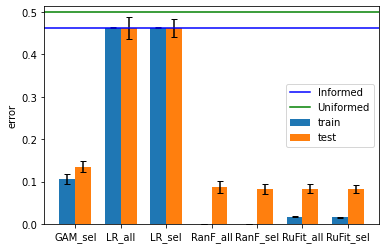

vesicle 



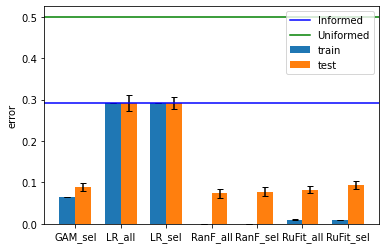

worm 



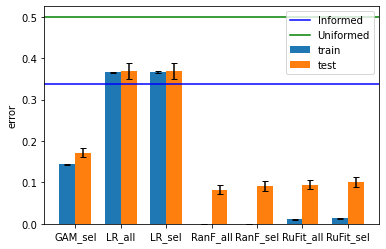

other 



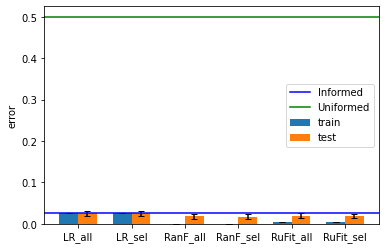

In [25]:
i = 0
for key in inter_no_comp_df:
    print(key, '\n')
    line = [informed_error[i], uniformed_error[i]]
    plot_summary('error', summ=inter_no_comp[key], baseline=line, names=['Informed', 'Uniformed'])
    i += 1
    plt.show()

__Log likelihood__

All the estimators performs much better than random guessing and informed guessing.

In [22]:
# get base line 
# log loss
informed_loglikelihood = []
for each in [data.sphere, data.vesicle, data.worm, data.other]:
    uniq, cnt = np.unique(each, return_counts=True)
    prob = cnt/sum(cnt)
    informed_loglikelihood.append(sum(1*prob * np.log2(prob)))
print('Informed loglikelihood: ', informed_loglikelihood)

uniformed_loglikelihood = [1*0.5 * np.log2(0.5)*2] * 3
print('Uninformed loglikelihood: ', uniformed_loglikelihood)

Informed loglikelihood:  [-0.9960115235485287, -0.8715841441742509, -0.9227346209530941]
Uninformed loglikelihood:  [-1.0, -1.0, -1.0]


sphere 



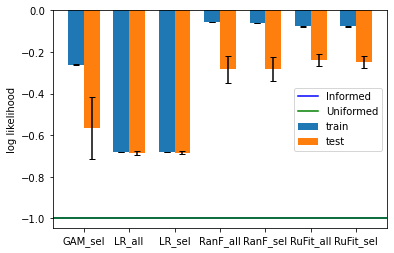

vesicle 



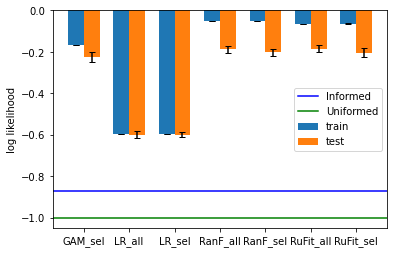

worm 



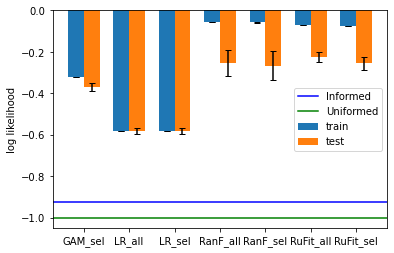

other 



IndexError: list index out of range

In [23]:
i = 0
for key in inter_no_comp:
    print(key, '\n')
    line = [informed_loglikelihood[i], uniformed_loglikelihood[i]]
    plot_summary('log likelihood', summ=inter_no_comp_df[key], baseline=line, names=['Informed', 'Uniformed'])
    i += 1
    plt.show()